In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2]:
data = pd.read_csv("Transformed_Housing_Data2.csv")

step 3 - scaling data

In [3]:
y = data['Sale_Price']
x = scaler.fit_transform(data.drop(columns=['Sale_Price']))
x = pd.DataFrame(data = x, columns=(data.drop(columns=['Sale_Price']).columns))

In [4]:
x.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [5]:
# pair of independent variables with correlation greater than 0.5
k = x.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5)) & (i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
vif_data = x
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [8]:
VIF[VIF == VIF.max()]. index[0]

'Flat Area (in Sqft)'

In [9]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def mc_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index=data.columns)
    if vif.max() > 5:
        col_to_drop = vif[vif == vif.max()].index[0]
        print(f"{col_to_drop} has been removed")
        data = data.drop(columns=[col_to_drop])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

# Your loop
for i in range(7):
    vif_data = mc_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [10]:
vif_new = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
vif_new, len(vif_new)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

<h3>Train/Test set</h3>

In [11]:
x = vif_data
y = data['Sale_Price']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

<h3>Linear Regression</h3>

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

<h2>Checking the accuracy of Model</h2>

In [15]:
predictions = lr.predict(x_test)
lr.score(x_test,y_test)

0.8461987715586199

In [16]:
len(vif_data), len(vif_new)

(21609, 28)

In [17]:
residuals = predictions - y_test
residual_table = pd.DataFrame({ 'residuals' : residuals,
                               'predictions' : predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [18]:
range(int(residual_table['predictions'].max()))

range(0, 1717743)

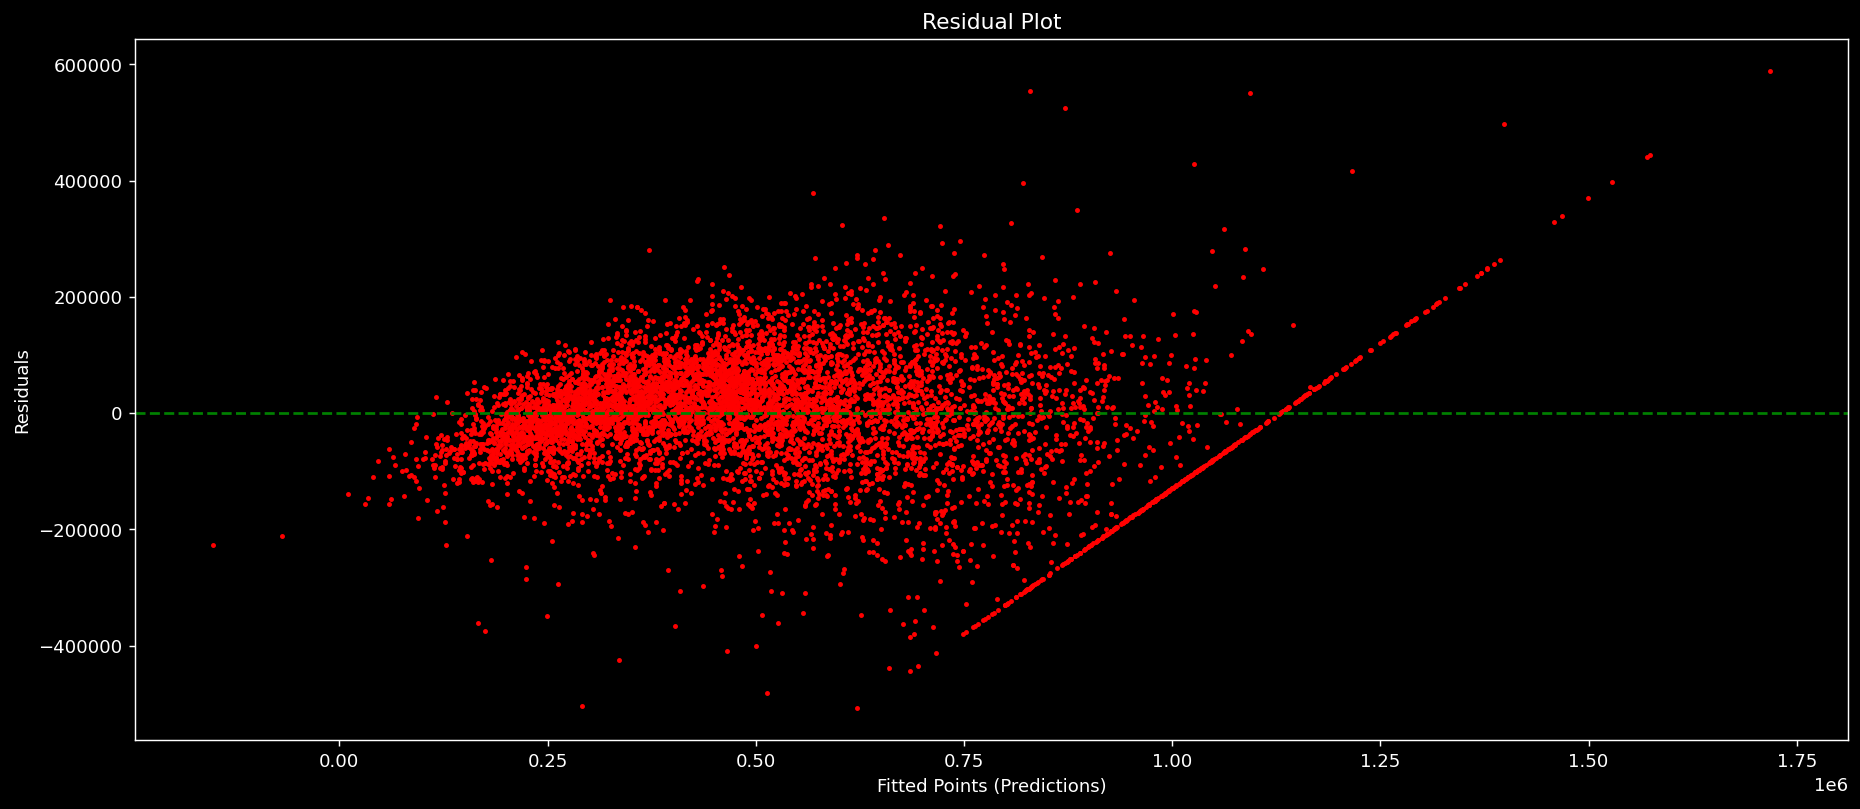

In [19]:
# Generate the residual plot
plt.figure(dpi=130, figsize=(17,7))
plt.scatter(residual_table['predictions'], residual_table['residuals'], color='red', s=3)

# Improved zero line
plt.axhline(y=0, color='green', linestyle='--')

plt.xlabel('Fitted Points (Predictions)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


<h4>In the above diagram, say the point is at (0.5,20000) so the x-axis denote predcited value from model <br> whereas y denote the value was 20000 more than prediction</h4>

<h3>Check Distribution of error</h3>

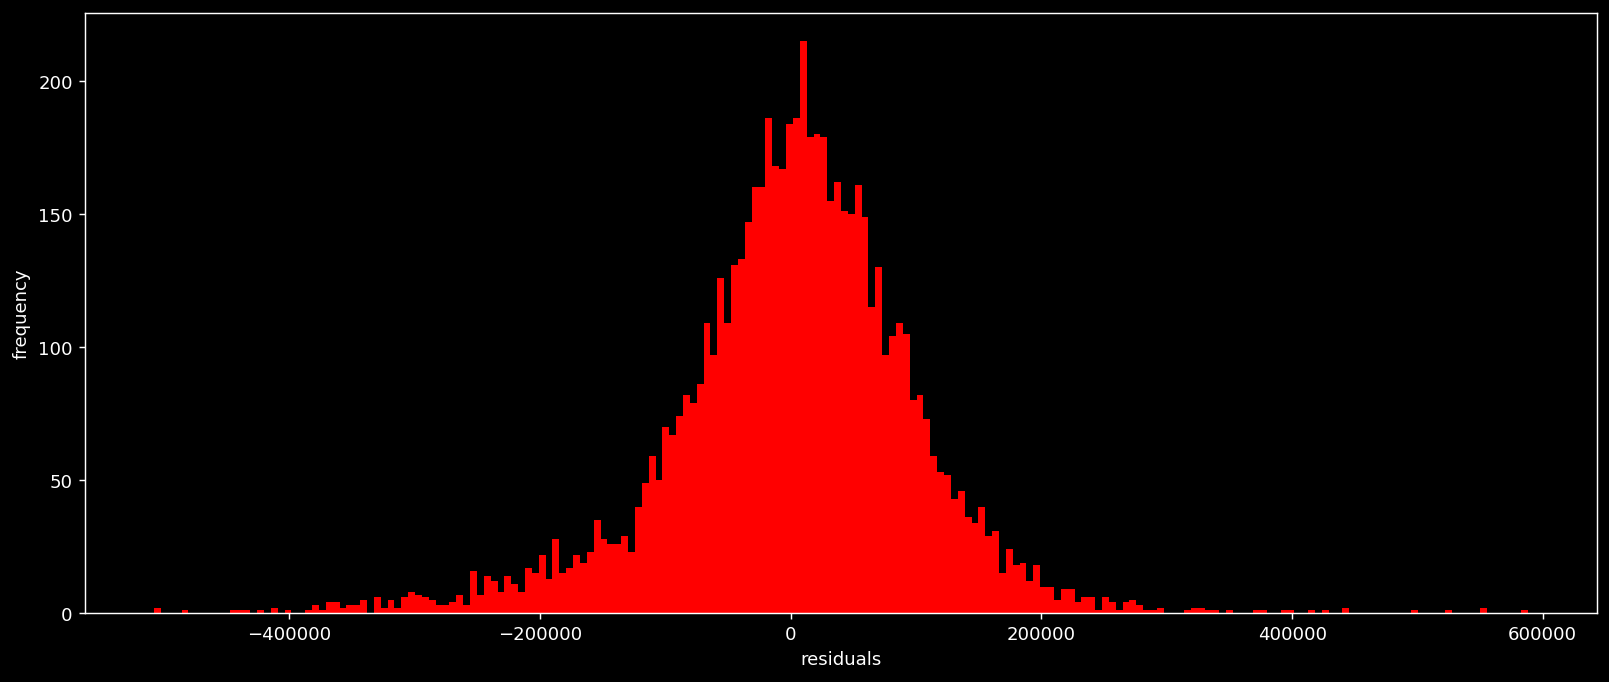

In [20]:
plt.figure(dpi=130,figsize=(15,6))
plt.hist(residual_table['residuals'],color='red',bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.show()

<h3>The bulk of residuals follow normal distribution But outliers can be seen on far right</h3>

<h4> Model coefficients </h4>

In [21]:
coefficient_table = pd.DataFrame({'column' : x_train.columns, 
                                  'coefficients' : lr.coef_})
coefficient_table = coefficient_table.sort_values( by = 'coefficients')

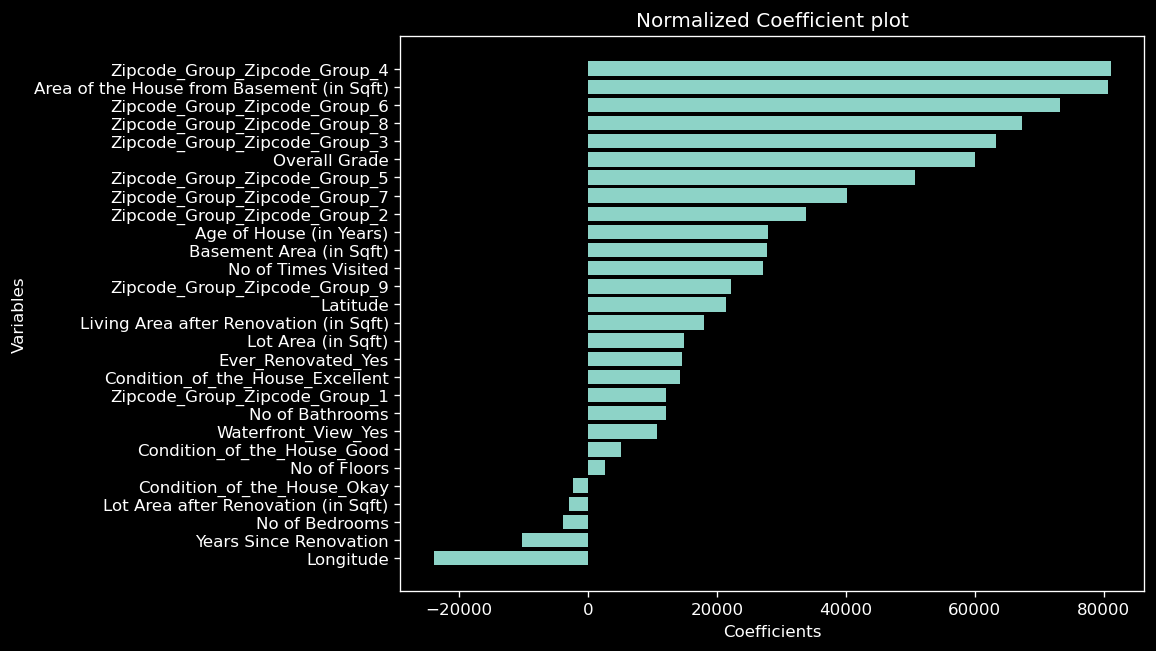

In [22]:
plt.figure(figsize=(8,6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh(x,y)
plt.xlabel("Coefficients")
plt.ylabel("Variables")
plt.title("Normalized Coefficient plot")
plt.show()

<h3> Adjusted R2 Value</h3>

In [23]:
def adj_r2( m ,data_y, predictions):
  from sklearn.metrics import r2_score
  R = r2_score(data_y, predictions)
  n = len(data_y)
  adj_R = 1 - ((1-R)*(n-1))/(n-m-1)
  return adj_R

<h4>Fordward Feature Selection</h4>

In [24]:
def return_r2(X, Y, model):
  model.fit(X, Y)
  pred = model.predict(X)
  m = len(X.columns)
  r2 = adj_r2(m, Y, pred)
  return r2

In [91]:
def forward_selection(model, X, Y, max_features):
  f_col = []
  history = []
  
  for i in range(max_features):

    f_col.append('blank')
    tmp = f_col[:]
    Rmax = -1

    for var in X.columns:
      tmp[-1] = var
      r2 = return_r2( X[tmp] , Y, model)
      if r2 >= Rmax:
        Rmax = r2
        f_col[-1] = var
        elim = var
  
    print("Selected",f_col[-1],"with new r2 =",Rmax)
    history.append(Rmax)

  return Rmax, history, X[f_col]

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

score, history, sel_data = forward_selection(lr, x_train, y_train, 5)

Selected Overall Grade with new r2 = 0.46330521459442986
Selected Latitude with new r2 = 0.5719394706222798
Selected Living Area after Renovation (in Sqft) with new r2 = 0.6259771955140173
Selected Age of House (in Years) with new r2 = 0.6707670543852546
Selected No of Bathrooms with new r2 = 0.7003064994858662


In [24]:
def backward_elimination(model, X, Y, min_feature):
    elim_data = X[:]
    r2_history=[]
    base_r2 = return_r2(elim_data,Y,model)
    print("base r2 is ",base_r2)
    for i in range(X.shape[1] - min_feature):
        difference = -100
        for var in elim_data.columns:
            tmp = elim_data.drop(columns=[var])
            r2 = return_r2(tmp,Y,model)
            if (r2-base_r2) > difference:
                difference = r2-base_r2
                eliminate = var
                new_r2 = r2
        elim_data.drop(columns=[eliminate],inplace=True)
        r2_history.append(new_r2)
        print(eliminate," Eliminate: New adj_r2 ", new_r2)
        base_r2=new_r2
    return base_r2,r2_history,elim_data

In [31]:
def backward_elimination(model, X, Y, min_feature):
    elim_data = X.copy()  # Use copy() to avoid modifying original X
    r2_history = []
    base_r2 = return_r2(elim_data, Y, model)
    print("Base R²:", base_r2)

    while elim_data.shape[1] > min_feature:
        difference = -float('inf')
        eliminate = None
        new_r2 = base_r2

        for var in elim_data.columns:
            tmp = elim_data.drop(columns=[var])  # Don't use inplace=True
            r2 = return_r2(tmp, Y, model)

            if (r2 - base_r2) > difference:
                difference = r2 - base_r2
                eliminate = var
                new_r2 = r2

        if eliminate is None:
            break  # Avoid errors in case of unexpected conditions

        elim_data = elim_data.drop(columns=[eliminate])
        r2_history.append(new_r2)

        print(f"Eliminated {eliminate}: New Adjusted R² = {new_r2}")
        base_r2 = new_r2

    return base_r2, r2_history, elim_data



In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
score,history,survived_data = backward_elimination(lr,x_train,y_train,1)

Base R²: 0.8409462124647622
Eliminated No of Floors: New Adjusted R² = 0.8409014194514581
Eliminated Lot Area after Renovation (in Sqft): New Adjusted R² = 0.8408460809601316
Eliminated Condition_of_the_House_Okay: New Adjusted R² = 0.8407652282453583
Eliminated No of Bedrooms: New Adjusted R² = 0.8406289971591606
Eliminated Condition_of_the_House_Good: New Adjusted R² = 0.8403221208948972
Eliminated Years Since Renovation: New Adjusted R² = 0.8398115632177104
Eliminated Ever_Renovated_Yes: New Adjusted R² = 0.8392722143762281
Eliminated No of Bathrooms: New Adjusted R² = 0.8382714088544515
Eliminated Living Area after Renovation (in Sqft): New Adjusted R² = 0.8369767220336065
Eliminated Waterfront_View_Yes: New Adjusted R² = 0.8355203641776985
Eliminated Zipcode_Group_Zipcode_Group_1: New Adjusted R² = 0.8338069251181028
Eliminated Lot Area (in Sqft): New Adjusted R² = 0.8316939345427641
Eliminated Condition_of_the_House_Excellent: New Adjusted R² = 0.8294061589140227
Eliminated Longi

In [30]:
history

[0.8409014194514581,
 0.8408460809601316,
 0.8407652282453583,
 0.8406289971591606,
 0.8403221208948972,
 0.8398115632177104,
 0.8392722143762281,
 0.8382714088544515,
 0.8369767220336065,
 0.8355203641776985,
 0.8338069251181028,
 0.8316939345427641,
 0.8294061589140227,
 0.8261145030651567,
 0.8213877113640011,
 0.8157109211644782,
 0.8004895594287824,
 0.7823124189994886,
 0.7705391894883504,
 0.7582604969944867,
 0.7454598431073396,
 0.7244558015744126,
 0.7005864887603126,
 0.6700974456787372,
 0.6176238677000111,
 0.5719394706222798,
 0.46330521459442986]

Text(0, 0.5, 'Adj R2 score')

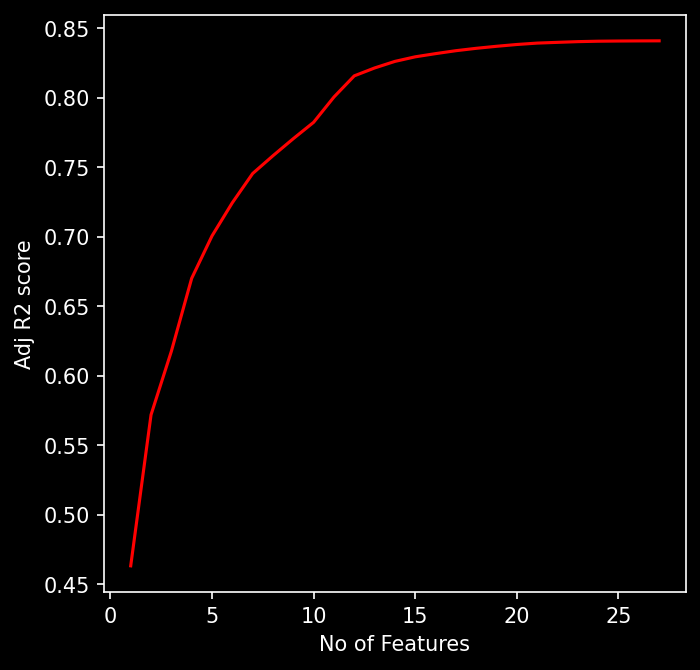

In [29]:
plt.figure(dpi=150, figsize=(5,5))
plt.plot(range(len(history),0,-1),history,color='red')
plt.xlabel("No of Features")
plt.ylabel("Adj R2 score")